In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import time
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
register_matplotlib_converters()

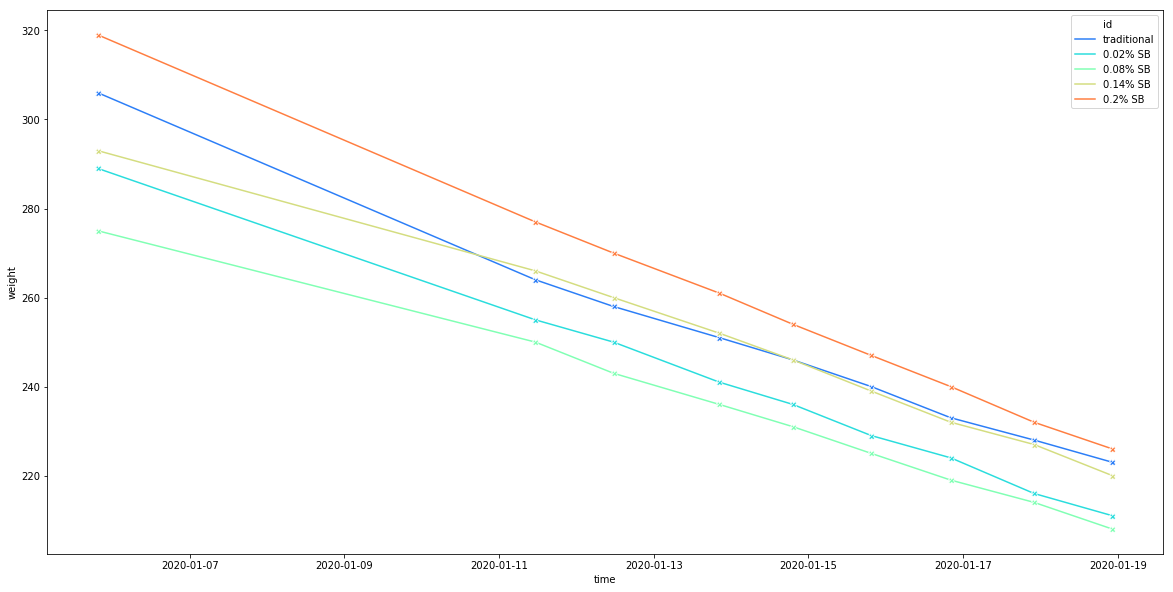

In [174]:
df = pd.read_csv('./data/jerk_01.csv').T

idx_to_name = {0 : 'traditional', 1: '0.02% SB', 2: '0.08% SB', 3: '0.14% SB' , 4: '0.2% SB'}

def parse_date(date_str):
    return datetime.fromtimestamp(time.mktime(time.strptime(date_str, "%Y-%m-%dT%H:%M")))    

def extract_sausage(name, col):
    sausage_df = pd.concat([col.reset_index()]).rename(columns={'index' : 'time', name : 'weight'})
    id_df = pd.DataFrame(np.repeat(name, col.shape[0]), columns=['id'])
    sausage_df = pd.concat([sausage_df, id_df], axis=1)
    sausage_df['time'] = sausage_df['time'].apply(parse_date)
    sausage_df['loss'] = sausage_df['weight'] / sausage_df['weight'].iloc[0]
    sausage_df['id'] = sausage_df['id'].apply(lambda x: idx_to_name[x
                                                                   ])
    return sausage_df

sausages_df = pd.concat([extract_sausage(name, col) for name, col in df.iteritems()])
# TODO
# - linear regression

plt.figure(figsize=(20, 10))
sns.lineplot(x='time', y='weight', hue='id', data=sausages_df, palette='rainbow', marker='X')

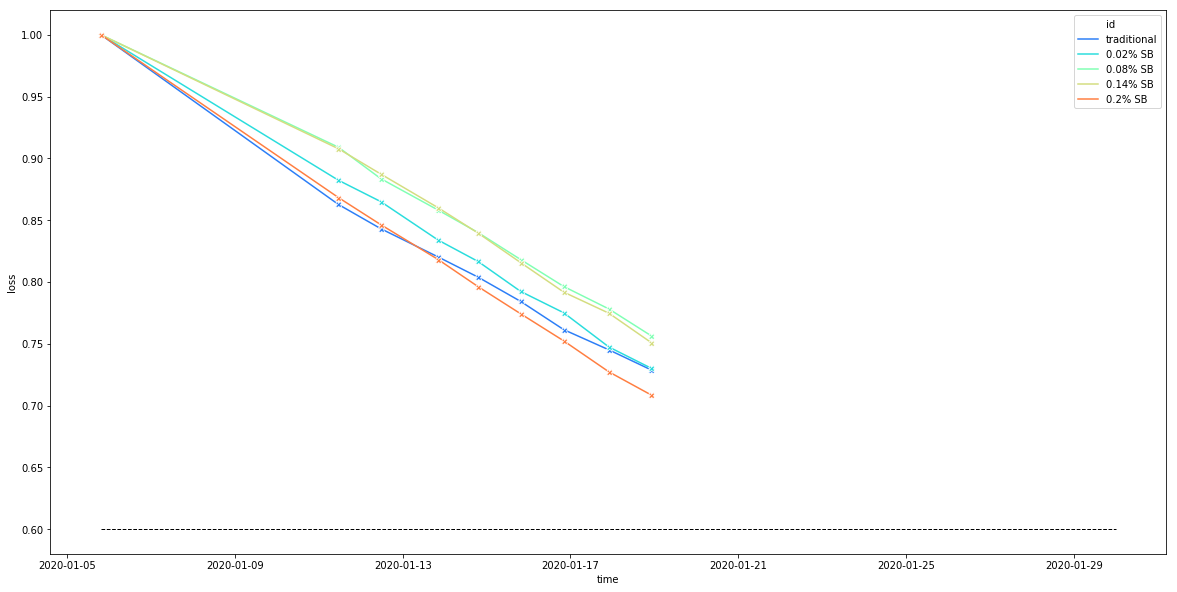

In [206]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='time', y='loss', hue='id', data=sausages_df, palette='rainbow', marker='X')
d0 = sausages_df['time'].iloc[0]
dn = pd.Timestamp(d0.year, d0.month, d0.day + 25)
plt.plot([d0, dn], [0.6, 0.6], linewidth=1, color='black', linestyle='--')